In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Scale-Invariant Feature Transform (SIFT)

Text(0.5, 1.0, 'SIFT Keypoint')

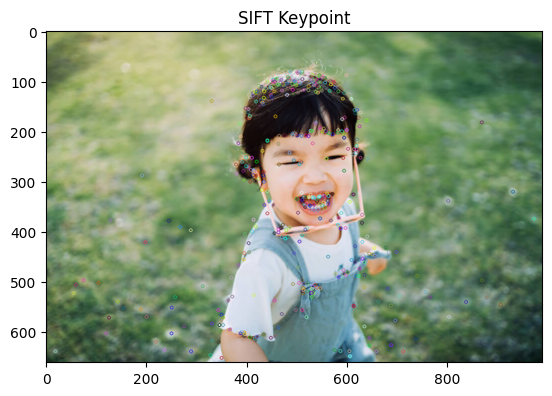

In [9]:
img = cv2.imread("kid.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create(nfeatures=500, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)
keypoint, descriptor = sift.detectAndCompute(img_gray, None)

img_w_sift = cv2.drawKeypoints(img, keypoint,None)

plt.imshow(cv2.cvtColor(img_w_sift,cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoint")

Oriented FAST and Rotated BRIEF (ORB) - better and longer

Text(0.5, 1.0, 'ORB Keypoint')

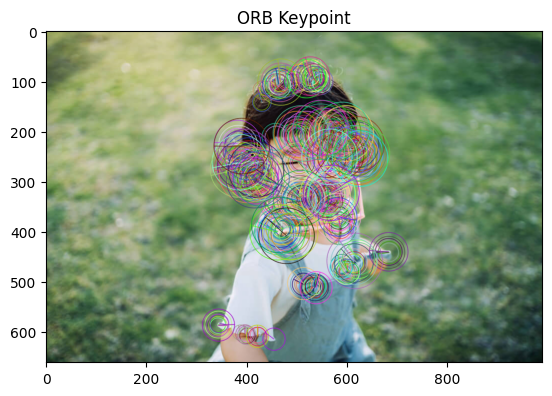

In [10]:
orb = cv2.ORB_create()
keypoint, descriptor = orb.detectAndCompute(img_gray, None)

img_w_orb = cv2.drawKeypoints(img, keypoint,None,
                              flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(cv2.cvtColor(img_w_orb,cv2.COLOR_BGR2RGB))
plt.title("ORB Keypoint")

Harris Corner Detector

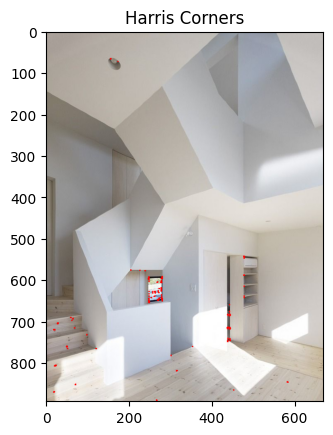

In [11]:
house = cv2.imread("house.jpg")
house_gray = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)

harris = cv2.cornerHarris(house_gray, 2, 3, 0.04)
harris = cv2.dilate(harris, None)
thresh = 0.01 * harris.max()
corner_image = house.copy()
corner_image[harris > thresh] = [0, 0, 255]
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.show()

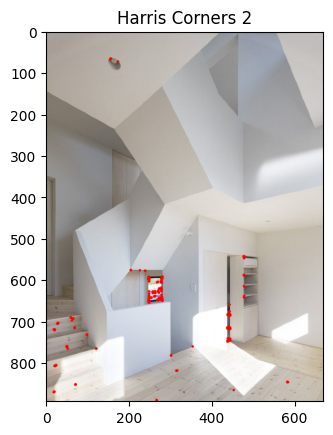

In [15]:
blockSize = 2  # Try 2, 3, or 5
ksize = 3      # Try 3 or 5
k = 0.04       # Try values between 0.04 and 0.06

dst = cv2.cornerHarris(house_gray, blockSize, ksize, k)

# Threshold for an optimal value, it may vary depending on the image.
threshold = 0.01 * dst.max()  # Adjust this threshold!

# Draw detected corners on the image
for y in range(0, dst.shape[0]):
    for x in range(0, dst.shape[1]):
        if dst[y, x] > threshold:
            cv2.circle(house, (x, y), 3, (0, 0, 255), -1) # Red circles

plt.imshow(cv2.cvtColor(house, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners 2')
plt.show()

Shi-Tomasi Corner Detector

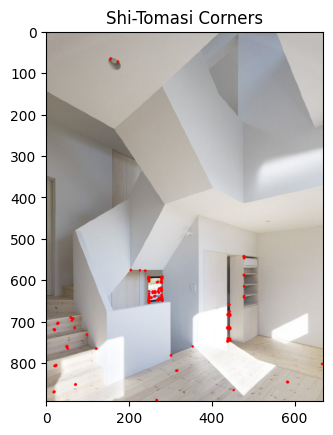

In [16]:

corners = cv2.goodFeaturesToTrack(house_gray, 100, 0.01, 10)                   #(img, top 100 corner, quantity level; 0.1 = 10%, distance between corner)
corners = np.intp(corners)
for i in corners:
    x, y = i.ravel()
cv2.circle(house, (x, y), 3, (0, 0, 255), -1)
plt.imshow(cv2.cvtColor(house, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners')
plt.show()

In [ ]:
# Parameters for goodFeaturesToTrack()

maxCorners = 100  # Maximum number of corners to detect
qualityLevel = 0.01  # Minimum quality level of the corner (0-1)
minDistance = 10  # Minimum Euclidean distance between corners
blockSize = int(3)  # Size of the neighborhood for corner detection
useHarrisDetector = False  # Set to True to use Harris, False for Shi-Tomasi (default)
k = 0.04  # Harris detector free parameter (only used if useHarrisDetector=True)

corners = cv2.goodFeaturesToTrack(house_gray, maxCorners, qualityLevel, minDistance, None, blockSize, useHarrisDetector, k)

# Draw the detected corners
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(house, (int(x), int(y)), 3, (0, 0, 255), -1)

plt.imshow(cv2.cvtColor(house, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners 2')
plt.show()

Contour

In [ ]:
img = cv2.imread("golden.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh, result = cv2.threshold(gray, 200,255, cv2.THRESH_BINARY)      # 246,255 is better
# Find Image Contour
contours, hierarchy = cv2.findContours(result, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(contours) # Show array of contours
print(len(contours)) # Count points of contour
# Draw contour
cv2.drawContours(img, contours, -1, (0,255,0), 2) # draw green line, width = 2
# cv2.imshow("Binary img", result)
cv2.imshow("Contours img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(array([[[0, 0]],

       [[0, 1]],

       [[0, 2]],

       ...,

       [[3, 0]],

       [[2, 0]],

       [[1, 0]]], shape=(1996, 1, 2), dtype=int32), array([[[253, 332]],

       [[254, 331]],

       [[255, 331]],

       [[256, 332]],

       [[255, 333]],

       [[254, 333]]], dtype=int32), array([[[ 35, 313]],

       [[ 36, 312]],

       [[ 37, 313]],

       [[ 36, 314]]], dtype=int32), array([[[ 68, 308]],

       [[ 69, 307]],

       [[ 70, 307]],

       [[ 71, 308]],

       [[ 70, 309]],

       [[ 69, 309]]], dtype=int32), array([[[282, 286]],

       [[283, 285]],

       [[284, 285]],

       [[285, 286]],

       [[284, 287]],

       [[283, 288]],

       [[282, 288]],

       [[281, 287]]], dtype=int32), array([[[130, 272]],

       [[131, 271]],

       [[132, 272]],

       [[131, 273]]], dtype=int32), array([[[263, 251]],

       [[264, 250]],

       [[265, 251]],

       [[264, 252]]], dtype=int32), array([[[160, 249]],

       [[161, 248]],

       [[162